# **Trabajo de investigacion de Modelo predictivo SHAP**
# *SHAP(SHapley Additive exPlanations)*
El objetivo: 
* Aplicar modelo de regresion LinearRegression de comparacion para el best model de algoritmos
* Generar entrenamiento
* Visualizacion de prediccion

In [75]:
import numpy as np # linear algebra
np.bool = np.bool_
np.float = float 
import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.use('TkAgg') #util para visualizar las imagenes y guardarlas en una ruta fija.
import seaborn as sns
import shap
from sklearn.model_selection import KFold,train_test_split,cross_val_predict,StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# from lime import lime_tabular
import warnings
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path
import os
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import functions

shap.initjs()
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")


../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021c2.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitoFallidoProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosSol.xlsx
../resources/v2_hitosExitoFalloColESol1.csv
../resources/v2_hitosExitoFalloColESol1Prograna.csv
../resources/v2_hitosExitoFalloSol1Programa.csv
../resources/causalidad\causalidad.dot
../resources/causalidad\causalidad.png
../resources/causalidad\causalidad2.dot
../resources/causalidad\causalidad_e29.dot
../resources/causalidad\causalidad_exitosos.dot
../resources/causalidad\causalidad_hito1.dot
../

In [76]:
# Read and preview data
df = pd.read_csv("../resources/v2_hitosExitoFalloColESol1.csv", delimiter=";", skipinitialspace=True)

In [77]:
df.describe()

,hito1,hito2,exitosos,fallidos,e0,e1,e2,e3,e4,e5,...,e44,e45,e46,e47,e48,e49,e50,e51,e52,sol1
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.0,839.000000,839.000000,839.0,...,839.000000,839.0,839.0,839.0,839.0,839.0,839.0,839.0,839.0,839.000000
mean,13.353993,0.168057,7.476758,11.287247,0.505364,0.009535,0.0,0.352801,0.734207,0.0,...,0.010727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.642789
std,10.370917,1.929950,5.361101,8.432787,0.500269,0.097239,0.0,0.478126,0.442018,0.0,...,0.103076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.832625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,3.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.200000
50%,13.000000,0.000000,7.000000,10.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.700000
75%,20.000000,0.000000,11.000000,16.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.100000
max,42.000000,32.000000,28.000000,47.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000


In [78]:
#creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df['aprobado']=df.apply(lambda x: functions.set_in_aprobado_nota(x['sol1']),axis = 1 )
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


In [79]:
# verificar los valores en todas las columnas
student_array = df.to_numpy()

# Verificar si hay valores no finitos en el dataset
is_finite = np.isfinite(student_array)

print(is_finite)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [80]:
# Obtener los valores correspondientes donde is_finite es True
finite_values = student_array[is_finite]
print(finite_values)

[17.  0. 10. ...  0.  7.  1.]


In [81]:
# Verificar si hay valores NaN en el dataset
is_nan = np.isnan(student_array)
print(is_nan)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


# **Entrenamiento**
Preparando las coordenadas de análisis X/Y, donde utilizaremos la columna 'sol1' (notas) como referencia para el eje Y, analizaremos el comportamiento de las demás columnas en relación a dicho eje X.

In [82]:
y = df['sol1']
X = df[
    ['hito1', 'hito2', 'exitosos', 'fallidos']
]

Se dividen los datos en un conjunto de entrenamiento (80% de los datos) y un conjunto de prueba (20% de los datos), y almacena esos conjuntos en las variables correspondientes. Esto es útil para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state= 1502)

# *Modelo de regresión lineal (Linear Regression)*

+ `Linear Regression` El modelo de regresión lineal es un algoritmo utilizado para modelar la relación entre una variable dependiente y una o más variables independientes. En este caso, se ajusta el modelo de regresión lineal con los siguientes parámetros:
+ `positive=True`: Este parámetro especifica que los coeficientes del modelo deben ser positivos. Es decir, impone la restricción de que los valores de los coeficientes deben ser mayores o iguales a cero. Esta opción es útil cuando se desea asegurar que las predicciones sean siempre no negativas.
+ `fit_intercept=True`: Este parámetro indica si se debe calcular o no el intercepto del modelo. Cuando está establecido en True, se calcula el valor del intercepto. El intercepto representa el valor de la variable dependiente cuando todas las variables independientes son igual a cero.

In [84]:
# Ajustar el modelo de regresión lineal
model = LinearRegression(
    positive=True,
    fit_intercept=True
)
# Entrenar modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

LinearRegression(positive=True)

In [85]:
# Realizar K-Fold Cross-Validation en los datos de entrenamiento
kfold = KFold(n_splits=10, shuffle=True, random_state=1502)

# Matrices para almacenar los resultados de validación cruzada
cv_scores = []
cv_predictions = []

for train_index, val_index in kfold.split(X_train, y_train):
    # Dividir los datos en conjuntos de entrenamiento y validación
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Entrenar el modelo en el conjunto de entrenamiento del fold actual
    model.fit(X_train_fold, y_train_fold)

    # Realizar predicciones en el conjunto de validación del fold actual
    y_val_pred = model.predict(X_val_fold)

    # Calcular el error cuadrático medio en el conjunto de validación del fold actual
    fold_score = mean_squared_error(y_val_fold, y_val_pred)
    cv_scores.append(fold_score)

    # Almacenar las predicciones del fold actual para su uso posterior
    cv_predictions.extend(y_val_pred)

    # Calcular el coeficiente de determinación en el conjunto de validación del fold actual
    r2 = r2_score(y_val_fold, y_val_pred)
    print("Fold - Error cuadrático medio:", fold_score)
    print("Fold - Coeficiente de determinación (R2):", r2)
    print()

# Calcular la puntuación promedio de validación cruzada
avg_score = np.mean(cv_scores)
percentage_score = avg_score * 100
print("Promedio del error cuadrático medio en validación cruzada:", avg_score)
print("Promedio del error cuadrático medio en validación cruzada en %:", percentage_score)

Fold - Error cuadrático medio: 2.812545953926757
Fold - Coeficiente de determinación (R2): 0.21500759683030457

Fold - Error cuadrático medio: 2.8283863141162655
Fold - Coeficiente de determinación (R2): 0.11952251819203696

Fold - Error cuadrático medio: 3.141342161093286
Fold - Coeficiente de determinación (R2): 0.03808476506174974

Fold - Error cuadrático medio: 2.2113189169593905
Fold - Coeficiente de determinación (R2): 0.2563835301083439

Fold - Error cuadrático medio: 2.4573781658637883
Fold - Coeficiente de determinación (R2): 0.17891069561418527

Fold - Error cuadrático medio: 3.961705941645667
Fold - Coeficiente de determinación (R2): -0.1293799730514682

Fold - Error cuadrático medio: 2.4209772941055006
Fold - Coeficiente de determinación (R2): 0.14275697150090227

Fold - Error cuadrático medio: 2.7337322612620727
Fold - Coeficiente de determinación (R2): 0.2394835337043385

Fold - Error cuadrático medio: 2.8285956745640566
Fold - Coeficiente de determinación (R2): 0.1505963

Si el RMSE es 0, significa que el modelo predice perfectamente los valores reales. Cuanto más cerca esté el MSE o RMSE de cero, mejor será el rendimiento del modelo en términos de la diferencia entre las predicciones y los valores reales.

In [86]:
# Calcular los valores SHAP para las predicciones
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# *Visualizando entrenamiento*
+ `explainer.expected_value`: Esto representa el valor esperado de las predicciones del modelo. Es el valor base al que se le suma o se le resta la contribución de cada característica para obtener la predicción final.
+ `shap_values[0,:]`: Estos son los valores SHAP para una muestra en particular del conjunto de prueba. Estos valores representan la contribución de cada característica en la predicción para esa muestra específica.
+ `X_test.iloc[0,:]`: Esto corresponde a la primera muestra del conjunto de prueba (X_test). Representa los valores de las características para esa muestra.
+ `link='logit'`: Este parámetro especifica la función de enlace utilizada para transformar los valores SHAP. En este caso, se utiliza la función logística (logit) para mapear los valores SHAP a una escala interpretable.
+ `matplotlib=True`: Este parámetro indica que se utilizará la biblioteca Matplotlib para generar el gráfico de fuerza.

`"higher"` se refiere a las instancias que tienen valores más altos de la característica en comparación con otras instancias, y tienen un mayor impacto en la probabilidad de ser `"sol1"`. Por otro lado, `"lower"` se refiere a las instancias con valores más bajos de la característica, que tienen un menor impacto en la probabilidad de ser `"sol1"`.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


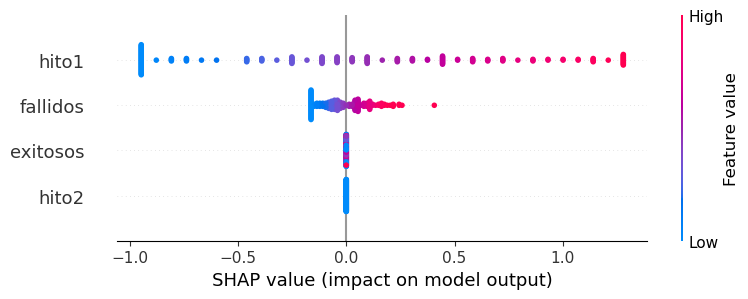

In [87]:
# Obtener los colores para cada punto en el gráfico de resumen de SHAP
colors = ['red', 'blue', 'green', 'yellow']  # Reemplaza con los colores deseados

# Mostrando Grafico de Caracteristicas
shap.summary_plot(shap_values, X_test, color=colors)

Al analizar el gráfico de caracteristicas, se pueden realizar las siguientes observaciones:

+ `"Hito1"` muestra varios puntos que van desde azul hasta rojo. Esto indica que esta característica tiene una amplia gama de valores en el conjunto de datos y contribuye significativamente a las predicciones del modelo.
+ `"Fallidos"` también tiene varios puntos que van desde azul hasta rojo, con un punto rojo que se destaca. Esto sugiere que esta característica tiene una influencia importante en las + predicciones y que hay una muestra particular que se ve afectada de manera notable.
+ `"Exitosos"` muestra varios puntos muy comprimidos entre azul y rojo. Esto indica que esta característica tiene una contribución más uniforme en las predicciones y que hay menos variabilidad en los valores de esta característica en el conjunto de datos.
+ `"Hito2"` muestra varios puntos azules muy comprimidos, lo que sugiere que esta característica tiene un impacto menor en las predicciones del modelo en comparación con las otras características.

divide by zero encountered in scalar divide


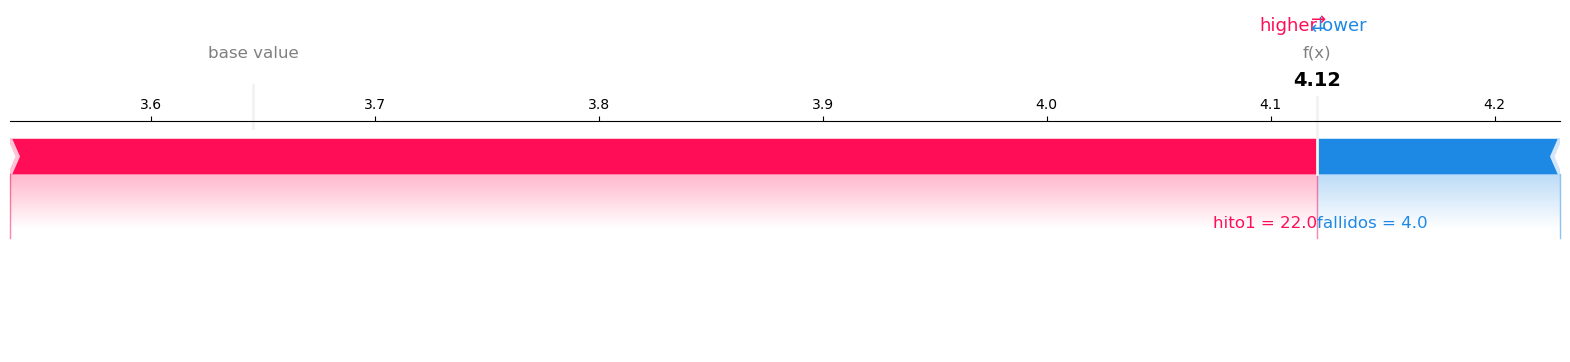

In [88]:
# Crear la figura de matplotlib
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True)

Al revisar el grafico generado por matplotlib podemos ver:
+ La sección "higher" muestra los hitos o valores positivos que contribuyen a aumentar el valor de predicción. En este caso, el hito1 es 22.0, lo que significa que esta característica contribuye positivamente al valor de predicción.
+ La sección "lower" muestra los valores negativos o fallidos que contribuyen a disminuir el valor de predicción. En este caso, el valor de fallidos es 4.0, lo que significa que esta característica tiene una contribución negativa al valor de predicción.

La marca "f(x)" en el gráfico representa el valor de predicción del modelo. En este caso, el valor es 4.12.

In [89]:
# Grafico Force Plot
shap.force_plot(explainer.expected_value, shap_values, X_test, matplotlib=False)

En el gráfico Force Plot se puede observar que:
+ En el eje y está seleccionado como "f(x)", lo que indica la contribución acumulada de las características para determinar la predicción del modelo.
+ En el eje x está seleccionado como "sample order by similarity", lo que significa que los datos se ordenan en función de su similitud.
+ Las barras verticales representan las características individuales del conjunto de datos.
+ La posición de cada barra en el eje horizontal indica si la contribución de la característica es positiva o negativa para la predicción.
+ El color de las barras indica el valor de la característica para cada muestra en X_test. Los colores se generan utilizando un mapa de colores.
+ La altura de cada barra muestra la magnitud de la contribución de la característica a la predicción del modelo.
+ El valor base, representado por una línea horizontal en el centro del gráfico, indica el valor de referencia desde el cual se inician las contribuciones de las características. En este caso, se establece en explainer.expected_value, en este caso se marca en: 3.646.
+ El gráfico muestra cómo las características individuales se suman para llegar a la predicción final del modelo para cada muestra en X_test. Las contribuciones se acumulan a medida que se avanza en el eje x.

# *Graficos de dependencia*
Representa la relación entre los valores de la variable "exitosos","fallidos","hito1","hito2" y los valores de Shapley en el modelo. Proporciona una visualización de cómo las variable en cuestion influye en las predicciones del modelo y ayuda a entender su importancia relativa.

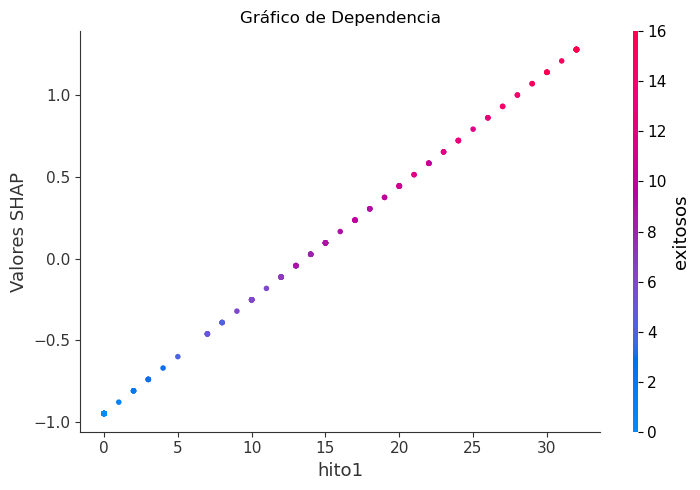

In [90]:
# Obtener el índice de la variable "hito1" en tu DataFrame
indice = X.columns.get_loc("hito1")

# Crear el gráfico de dependencia para "hito1"
shap.dependence_plot(indice, shap_values, X_test, feature_names=X.columns, show=False)

# Personalizar la apariencia del gráfico
plt.xlabel("hito1")
plt.ylabel("Valores SHAP")
plt.title("Gráfico de Dependencia")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

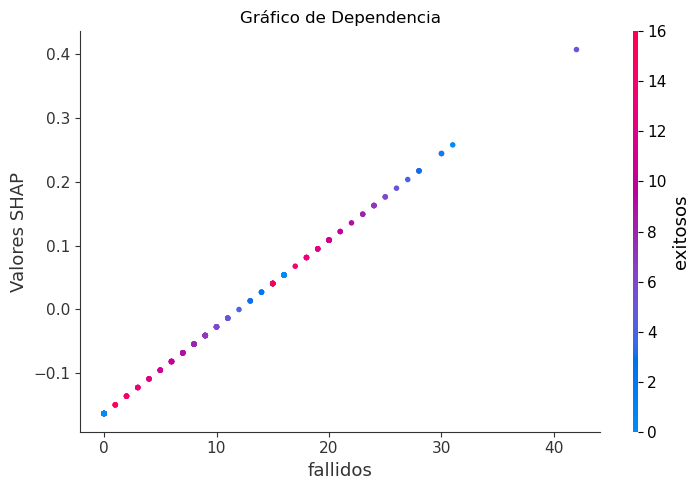

In [91]:
# Obtener el índice de la variable "fallidos" en tu DataFrame
indice = X.columns.get_loc("fallidos")

# Crear el gráfico de dependencia para "fallidos"
shap.dependence_plot(indice, shap_values, X_test, feature_names=X.columns, show=False)

# Personalizar la apariencia del gráfico
plt.xlabel("fallidos")
plt.ylabel("Valores SHAP")
plt.title("Gráfico de Dependencia")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

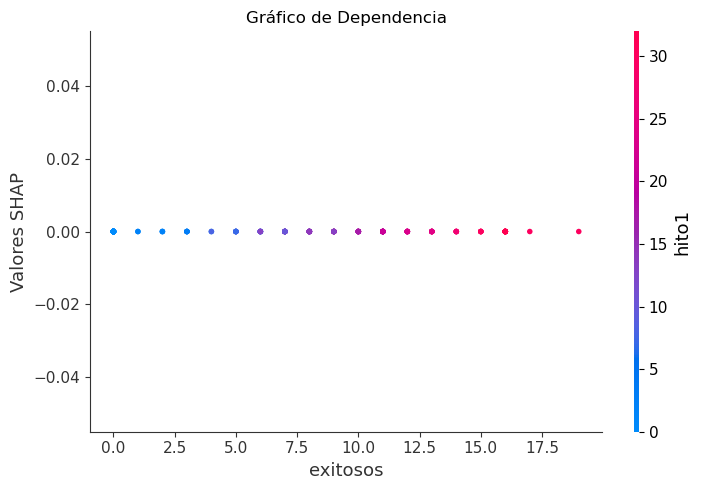

In [92]:
# Obtener el índice de la variable "exitosos" en tu DataFrame
indice = X.columns.get_loc("exitosos")

# Crear el gráfico de dependencia para "exitosos"
shap.dependence_plot(indice, shap_values, X_test, feature_names=X.columns, show=False)

# Personalizar la apariencia del gráfico
plt.xlabel("exitosos")
plt.ylabel("Valores SHAP")
plt.title("Gráfico de Dependencia")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

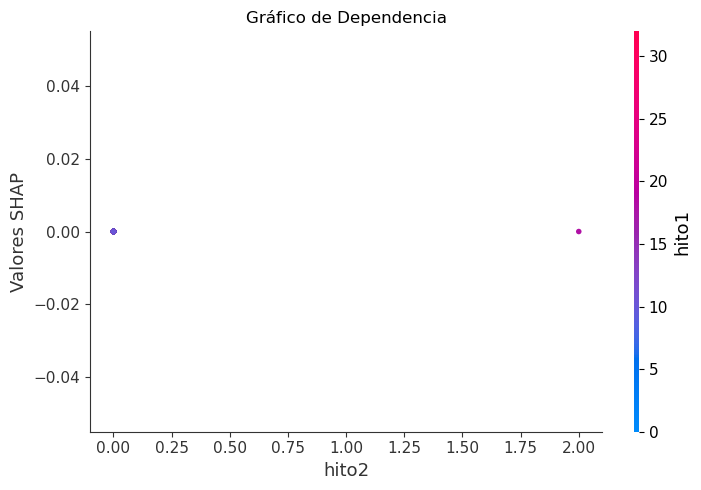

In [93]:
# Obtener el índice de la variable "hito2" en tu DataFrame
indice = X.columns.get_loc("hito2")

# Crear el gráfico de dependencia para "hito2"
shap.dependence_plot(indice, shap_values, X_test, feature_names=X.columns, show=False)

# Personalizar la apariencia del gráfico
plt.xlabel("hito2")
plt.ylabel("Valores SHAP")
plt.title("Gráfico de Dependencia")
plt.tight_layout()

# Mostrar el gráfico
plt.show()